#### Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

#### 50 000 USD per year is about 4 167 USD monthly. <br> In Poland 1USD = 3,73PLN now, so monthly this is about 15 542PLN, and per year 186 500PLN

SOURCE:<br>
http://archive.ics.uci.edu/ml/datasets/Adult <br>
https://www.kaggle.com/overload10/adult-census-dataset/tasks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
heading =['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
df = pd.read_csv("adult_data.txt", header=None, names = heading)
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### How many people in dataset have income >50K or <=50K

 <=50K    24720
 >50K      7841
Name: income, dtype: int64


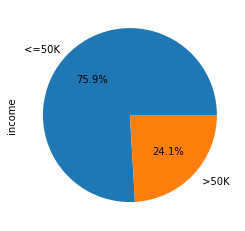

In [3]:
print(df['income'].value_counts())
df['income'].value_counts().plot.pie(autopct='%1.1f%%')

More people earn less or equal 5OK $.

### How about native countries?

In [4]:
print(df['native-country'].value_counts())

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

### GENDER AND INCOME

sex      income
 Female   <=50K     9592
          >50K      1179
 Male     <=50K    15128
          >50K      6662
Name: income, dtype: int64
-----------------------------------


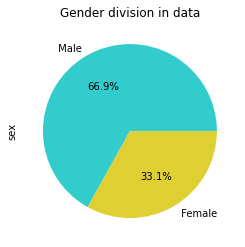

<Figure size 720x432 with 0 Axes>

-----------------------------------


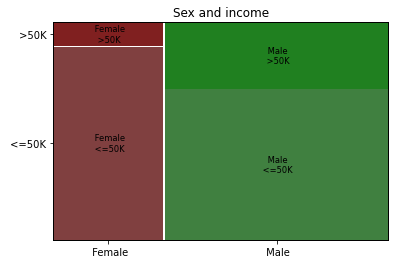

In [5]:
sex_income = pd.DataFrame({'sex': df['sex'], 'income': df['income']})
data = sex_income.income.groupby([sex_income.sex,  sex_income.income]).size()
plt.title('Gender division in data')
print(data)
print('-----------------------------------')
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#33cccc','#ded033'])
plt.figure(figsize=(10,6))
plt.show()
print('-----------------------------------')
mosaic(data, title = "Sex and income")
plt.show()

That's interesting that in data the egender of the smaller number is the female - models may work worse for woman.

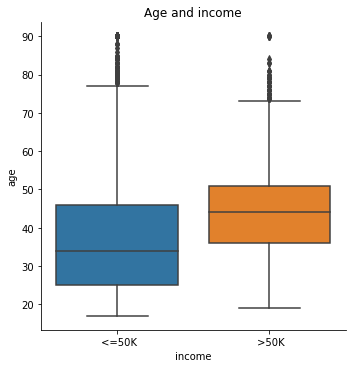

In [6]:
sns.catplot(x='income', y='age', kind="box", data=df)
plt.title('Age and income')
plt.show()

In [7]:
print('precise median age for >50K income : ',df[df['income']==' >50K']['age'].median(), 'yrs')

precise median age for >50K income :  44.0 yrs


In [8]:
print('precise median age for <=50K income : ',df[df['income']==' <=50K']['age'].median(), 'yrs')

precise median age for <=50K income :  34.0 yrs


MEDIAN value for people earning <=50K is around 35yrs, presicely.<br>
MEDIAN value for people earing >50K is around 45yrs.<br>
50% people who earn <=50K are between around 25 and 45. <br>
50% people who earn >50K are between around 38 and 50. <br>
IQR for >50K is visibly narrower than for <=50K.<br>

#### Adding target column with 0/1 values <br>
0 when INCOME <=50K <br>
1 when INCOME >50

In [13]:
df['target'] = df['income']
df['target'] = np.where(df['income'].isin([' >50K']), 1, 0)

id there any missing values in income?

In [9]:
missing_values_income = df['income'].isnull().sum()
print(missing_values_income)

0


No missing values in INCOME column

Correlation matrix to identify their relation with income.

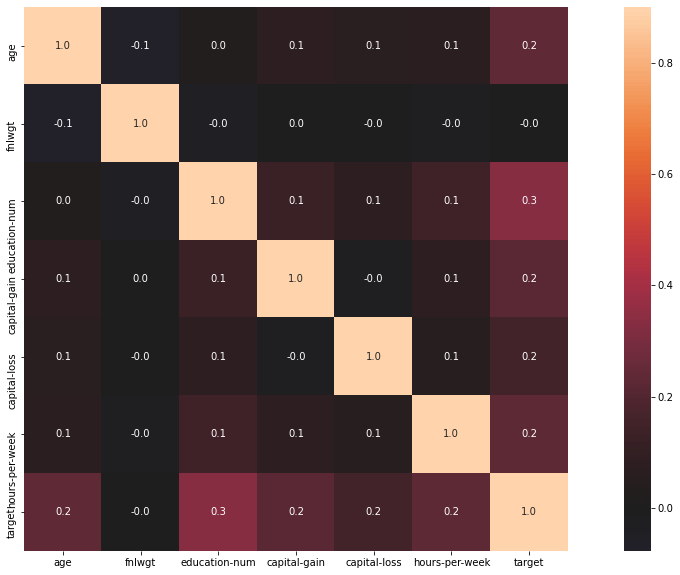

In [32]:
plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), vmax=.9, square=True, annot=True, fmt='.1f', center=0)
plt.show()